<a href="https://colab.research.google.com/github/xopherw/capstone-random-forrest/blob/main/Beijing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.experimental import enable_iterative_imputer
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.inspection import permutation_importance
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import numpy as np, pandas as pd, seaborn as sns

In [18]:
beijing_housing = "/content/drive/MyDrive/Colab Notebooks/Kaggle/beijing_housing.csv"
beijing_df = pd.read_csv(beijing_housing)

In [19]:
# Function for preprocessing with Imputer to fill missing value, Scaler to scale dataset, and Normalizer to normalize dataset
def pied_piper(df, y_value):
  pipe = Pipeline([("imputer", IterativeImputer()), ("scaler", StandardScaler()), ('normalizer', Normalizer())])
  sample = sampler(df)
  X = pipe.fit_transform(sample.drop([y_value], axis=1))
  y = np.log(sample[y_value])
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.8)
  return X_train, X_test, y_train, y_test

# Function to randomly select 15000 rows of data
def sampler(df):
  return df.sample(n=15000, ignore_index=True, random_state=69)

# Function to append model evaluation into a list
def evaluate_models_results(model_pipe, X, y):
    # Evaluate the model and return results
    result1, result2 = list(), list()
    score1_mean, score1_std, score2_mean, score2_std = list(), list(), list(), list()
    score1 = cross_val_score(model_pipe, X, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
    score2 = cross_val_score(model_pipe, X, y, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
    score1 = np.absolute(score1)
    score2 = np.absolute(score2)
    # Store results
    result1.append(score1)
    result2.append(score2)
    score1_mean.append(np.mean(score1))
    score2_mean.append(np.mean(score2))
    score1_std.append(np.std(score1))
    score2_std.append(np.std(score2))
    return score1_mean, score1_std, score2_mean, score2_std, result1, result2

# Funtion to evaluate feature importance and show plot
def feature_importances_plot(model, X, y):
  importances = permutation_importance(model, X, y, n_repeats=30, random_state=42)
  indices = importances.importances_mean.argsort()
  plt.title('Feature Importances')
  plt.barh(range(len(indices)), importances.importances_mean[indices], color='b', align='center')
  plt.yticks(range(len(indices)), [cols[i] for i in indices])
  plt.xlabel('Relative Importance')
  plt.show()
  

# **Beijing Data**

In [20]:
beijing_df['totalPrice'] = beijing_df['totalPrice'].apply(lambda x: x*10000) # Transform total price
cols = beijing_df.drop(['totalPrice'], axis=1).columns
evals =["algorithm","score", "MAE_mean", "MAE_std", "RMSE_mean", "RMSE_std", "MAE_result", "RMSE_result"]
evaluations = pd.DataFrame(columns=evals)

In [21]:
X_train, X_test, y_train, y_test = pied_piper(beijing_df, "totalPrice")

Random Forrest

In [22]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 66, criterion="absolute_error")

rf.fit(X_train, y_train)
score = rf.score(X_test, y_test)
print(score)

cross_list = list(evaluate_models_results(rf, X_test, y_test))
cross_list.insert(0, [score])
cross_list.insert(0, ["Random Forest"])
evaluations = evaluations.append(pd.DataFrame([[val for sublist in cross_list for val in sublist]], columns=evals))

0.9827172191318577


<ipython-input-22-d731a47b7b69>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluations = evaluations.append(pd.DataFrame([[val for sublist in cross_list for val in sublist]], columns=evals))


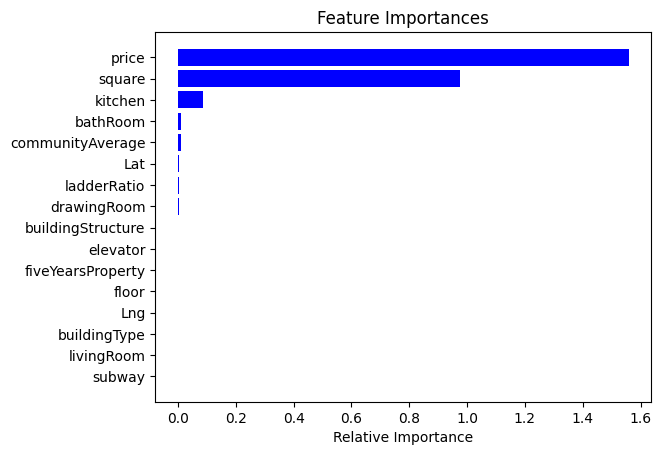

In [23]:
feature_importances_plot(rf, X_test, y_test)

K - Nearest Neighbor

In [24]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

knn.fit(X_train, y_train)
score = knn.score(X_test, y_test)
print(score)

cross_list = list(evaluate_models_results(knn, X_test, y_test))
cross_list.insert(0, [score])
cross_list.insert(0, ["KNN"])
evaluations = evaluations.append(pd.DataFrame([[val for sublist in cross_list for val in sublist]], columns=evals))

0.7706576936435885


<ipython-input-24-9310dc1f2843>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluations = evaluations.append(pd.DataFrame([[val for sublist in cross_list for val in sublist]], columns=evals))


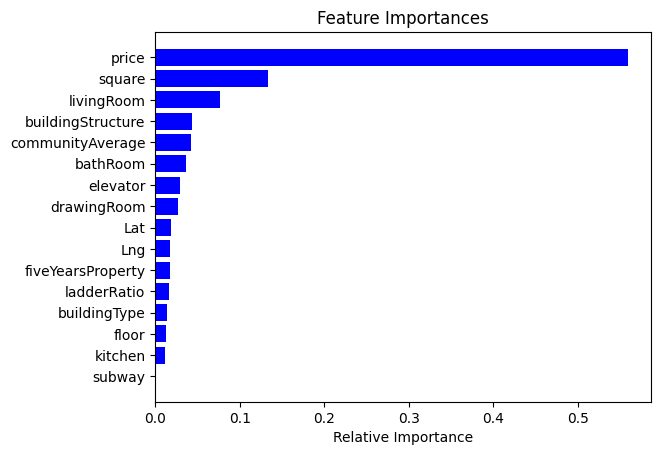

In [25]:
feature_importances_plot(knn, X_test, y_test)

Gradient Boost

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(criterion="squared_error", random_state=42)

gb.fit(X_train, y_train)
score = gb.score(X_test, y_test)
print(score)

cross_list = list(evaluate_models_results(gb, X_test, y_test))
cross_list.insert(0, [score])
cross_list.insert(0, ["Gradient Boost"])
evaluations = evaluations.append(pd.DataFrame([[val for sublist in cross_list for val in sublist]], columns=evals))

0.9733004881666283


<ipython-input-26-669816ca8390>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluations = evaluations.append(pd.DataFrame([[val for sublist in cross_list for val in sublist]], columns=evals))


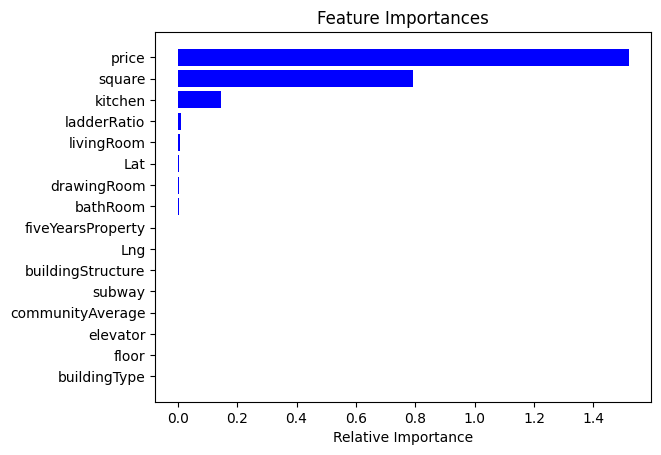

In [27]:
feature_importances_plot(gb, X_test, y_test)

SVR

In [28]:
from sklearn.svm import SVR

svr = SVR()

svr.fit(X_train, y_train)
score = svr.score(X_test, y_test)
print(score)

cross_list = list(evaluate_models_results(svr, X_test, y_test))
cross_list.insert(0, [score])
cross_list.insert(0, ["SVR"])
evaluations = evaluations.append(pd.DataFrame([[val for sublist in cross_list for val in sublist]], columns=evals))

0.9376669777158809


<ipython-input-28-ad74211e6ecd>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluations = evaluations.append(pd.DataFrame([[val for sublist in cross_list for val in sublist]], columns=evals))


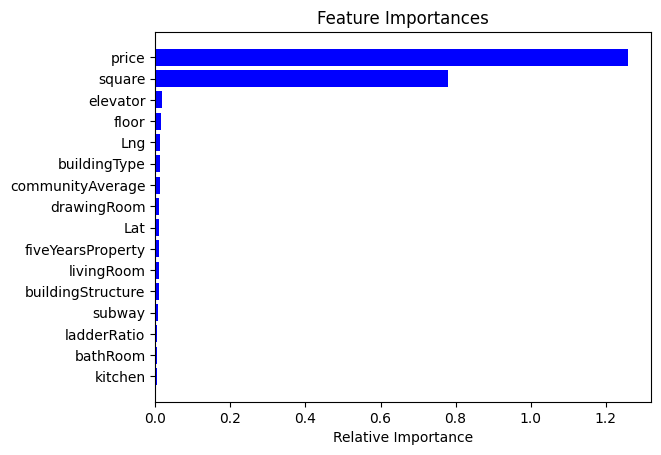

In [29]:
feature_importances_plot(svr, X_test, y_test)

Bayesian Linear Regression

In [30]:
from sklearn.linear_model import BayesianRidge

br = BayesianRidge(n_iter=150)

br.fit(X_train, y_train)
score = br.score(X_test, y_test)
print(score)

cross_list = list(evaluate_models_results(br, X_test, y_test))
cross_list.insert(0, [score])
cross_list.insert(0, ["BayeSian Ridge"])
evaluations = evaluations.append(pd.DataFrame([[val for sublist in cross_list for val in sublist]], columns=evals))

0.8382597284111463


<ipython-input-30-4f7d4451996b>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluations = evaluations.append(pd.DataFrame([[val for sublist in cross_list for val in sublist]], columns=evals))


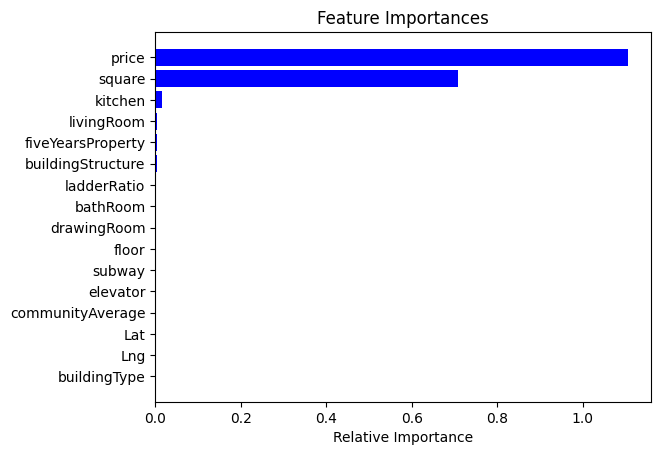

In [31]:
feature_importances_plot(br, X_test, y_test)

In [32]:
evaluations

,algorithm,score,MAE_mean,MAE_std,RMSE_mean,RMSE_std,MAE_result,RMSE_result
0,Random Forest,0.982717,0.049460,0.006952,0.133145,0.080087,"[0.04549160084452913, 0.06277667716732403, 0.0...","[0.09448690741952047, 0.2909160740976169, 0.08..."
0,KNN,0.770658,0.212955,0.008616,0.313090,0.055724,"[0.20198506616681064, 0.22372924791909032, 0.2...","[0.29925965584108766, 0.42252751608954064, 0.2..."
0,Gradient Boost,0.973300,0.059254,0.004222,0.130869,0.060130,"[0.05898429312809178, 0.06729513436333334, 0.0...","[0.10121416697422939, 0.24888707876634664, 0.1..."
0,SVR,0.937667,0.072340,0.002681,0.154390,0.070050,"[0.07140337036636472, 0.07709547054390153, 0.0...","[0.1384082370798607, 0.2919200584807993, 0.126..."
0,BayeSian Ridge,0.838260,0.134917,0.005593,0.225861,0.061776,"[0.12728167340063265, 0.14449143845180637, 0.1...","[0.2044530374870099, 0.3478952586464765, 0.205..."
